I found a [problem on Stack Overflow](https://stackoverflow.com/questions/67781086/dice-roll-statistics-histogram/67781842#67781842) that needed some help.  I started with a comment, but soon I was writing code to provide more substance.

It's a relatively simple probability problem involving two dice.  I started slapping some Python code into this Jupyter notebook, but there were errors.  I needed a debugger, which meant switching to PyCharm.  Unfortunately my PyCharm wasn't set up properly.  I had to switch from Python 3.7 interpreter to Anaconda.  PyCharm needed a few more packages to be installed.

But after a little effort I was able to forget about the IDE and concentrate on coding.

I haven't written much Python lately, so I had to look up everything.  But pretty soon I had some well-decomposed methods that demonstrated what I wanted.

In [1]:
import random
from collections import defaultdict
from matplotlib import pyplot as plt

theoretical_counts = {
    2: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    8: 5,
    9: 4,
    10: 3,
    11: 2,
    12: 1
}

def die_rolls(num_rolls):
    sum_counts: defaultdict[int, int] = defaultdict(int)
    for i in range(0, num_rolls):
        x = random.randint(1, 6)
        y = random.randint(1, 6)
        sum_counts[x + y] += 1
    return sum_counts

def counts_to_frequencies(counts):
    rolls = sum(counts.values())
    frequencies = {k: v/rolls for k, v in counts.items()}
    l: list[int] = list(frequencies.items())
    l.sort()
    return dict(l)

Now that I have these methods let's plot a histogram of 1,000 two die outcomes:

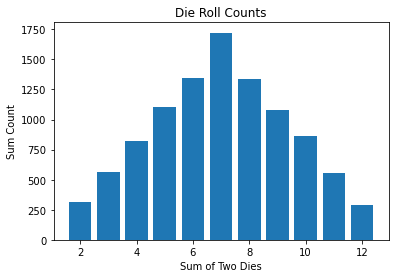

In [2]:
ntrials = 10000
die_rolls = die_rolls((ntrials))

plt.bar(die_rolls.keys(), die_rolls.values())
plt.title("Die Roll Counts")
plt.xlabel("Sum of Two Dies")
plt.ylabel("Sum Count")
plt.show()

Let's plot those counts as frequencies:

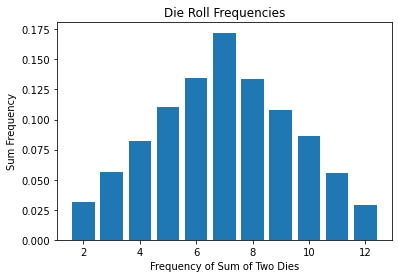

In [3]:
die_frequencies = counts_to_frequencies(die_rolls)
plt.bar(die_frequencies.keys(), die_frequencies.values())
plt.title("Die Roll Frequencies")
plt.xlabel("Frequency of Sum of Two Dies")
plt.ylabel("Sum Frequency")
plt.show()


What should those frequencies be?  Those are easy to calculate and plot:

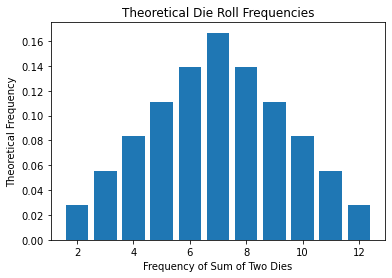

In [4]:
theoretical_frequencies = counts_to_frequencies(theoretical_counts)
plt.bar(theoretical_frequencies.keys(), theoretical_frequencies.values())
plt.title("Theoretical Die Roll Frequencies")
plt.xlabel("Frequency of Sum of Two Dies")
plt.ylabel("Theoretical Frequency")
plt.show()

The distribution is not a good approximation of the theoretical distribution.  I can improve it by running more trials.

It felt good to get this simple problem working.